In [ ]:
# Gregory Urman
# Regis University
# MSDS Optimal Decision Making
# Assignment 1
# 06-06-18

                                                     # Multi-Armed Bandit

# insert desription here 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# How do I explain what is going on below in words??? #

class Bandit:
    def __init__(self, m):
        self.m = m
        self.mean = 0
        self.N = 0
        self.s2 = 0        
    

    def pull(self):
        return np.random.randn() + self.m

    def update(self, x):
        self.N += 1
        if(self.N > 1):
            self.s2 = ((self.N - 2)/ (self.N -1)) * self.s2 + (x - self.mean) * (x -self.mean) / self.N # ??? is this formatted wrong?

        self.mean = (1 - 1.0/self.N)*self.mean + 1.0/self.N*x
    

In [5]:
# how many times do you play each of the Bandits?





In [6]:
def run_experiment(m1, m2, m3, eps, N):
    bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]

    data = np.empty(N)
    mean1 = np.empty(N)    # my current estimate of the mean for the 1st Bandit
    mean2 = np.empty(N)     
    mean3 = np.empty(N)
    mean4 = np.empty(N)
    var1 = np.empty(N)     # 
    var2 = np.empty(N)
    var3 = np.empty(N)
    
    
    for i in range(N):      # the algorithm itself, random distributions
    # epsilon greedy
        p = np.random.random()
        if p < eps:     # if p is less than epsilon, 45% of the time p will be less than epsilon if eps 0.45 or 45% 
            j = np.random.choice(3)
        else:
            j = np.argmax([b.mean for b in bandits])
        x = bandits[j].pull()
        bandits[j].update(x)
    
    # how do you know if epsilon is exploring? the number in random.choice
    
    # what does np.argmax do? it is picking the maximum argument, it takes into account each moving mean of the bandits and picking the highest one
        # it is the Exploit part of the problem
    
    # exploit = 1 - epsilon (1 minus epsilon)    
        
    # for the plot
        data[i] = x
        mean1[i] = bandits[0].mean
        mean2[i] = bandits[1].mean
        mean3[i] = bandits[2].mean
        var1[i] = bandits[0].s2
        var2[i] = bandits[1].s2
        var3[i] = bandits[2].s2
    
    
    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

  # plot moving average ctr (counter???)
    plt.plot(cumulative_average)
    plt.plot(np.ones(N)*m1)
    plt.plot(np.ones(N)*m2)
    plt.plot(np.ones(N)*m3)
    plt.xscale('log')
    plt.show()

    for b in bandits:
        print(b.mean)    # this is the self.mean

    variable = [cumulative_average, mean1, mean2, mean3, var1, var2, var3]    
    
    return variable
    
        
 #   return cumulative_average     # original

In [19]:
np.random.random()   # 

0.8925949403960771

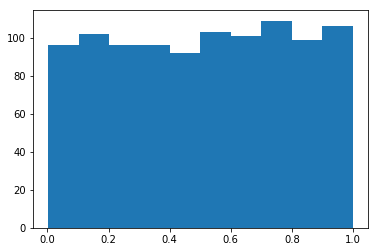

In [8]:
plt.hist(np.random.random(1000))
plt.show()

# down below: values go bet. 0 and 1.0, uniform distribution. 
    # how do I tell how many total? 100 Y-values for mean * 10 different bins 

    # not much range here


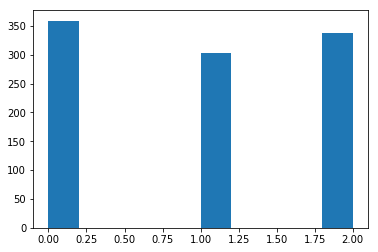

In [9]:
plt.hist(np.random.choice(3, 1000))
plt.show()

# this is very discreet. it only picks 0.00 or 1.00 or 2.00
# the algorithm is now picking a random bandit 1000 times



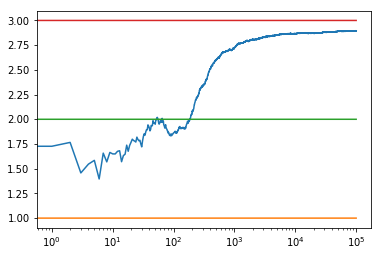

1.0264422705679872
2.0181663128546283
2.992733187794992


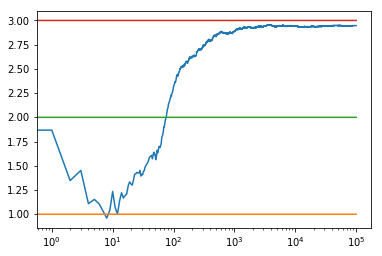

0.9884688077331062
1.985025511344362
2.9963171503664365


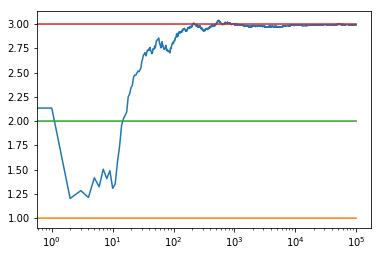

1.0152825386617164
2.035039740076151
3.0037080675482537


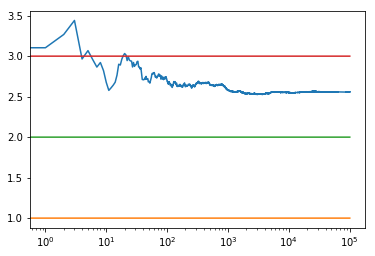

1.0038771308604229
2.0122218674067036
3.0040234802964267


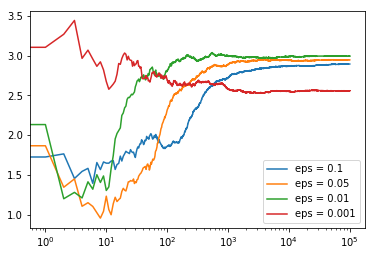

In [10]:
# running the Bandits


# 1st try, original means

if __name__ == '__main__':
    
    c_1 = run_experiment(1.0, 2.0, 3.0, 0.1, 100000) # 1.0, 2.0, 3.0 = mean, 2.0, 0.1 = epsilon values, 100000 = epochs
    c_05 = run_experiment(1.0, 2.0, 3.0, 0.05, 100000) # 5% epsilon
    c_01 = run_experiment(1.0, 2.0, 3.0, 0.01, 100000) # 1% epsilon
    c_001 = run_experiment(1.0, 2.0, 3.0, 0.45, 100000) # 45 % epsilon
    

# meaning: 
    # I'm comparing 4 different experiments (3 bandits), all distributions are normally distributed,
    # see pic 1 from Joe, standard deviations for each Bandit cross at the other Bandit's means, 
    # let's say we pulled Bandit 2 first --> we will most likely get a value between 1 and 3 but it could be larger
    # then you pull Bandit 1 
    # then you pull Bandit 3 
    

    # how do you understand each distribution? Explore vs. Exploit the output data.
        # explore = higher epsilon, exploit = lower epsilon (eps = 0.0001 means 0.01% of the time we choose random bandit to explore)
            # epsilon = 0.5 means 50% of the time, we explore bandit and 50% we exploit highest moving mean
    
  # log scale plot
    plt.plot(c_1[0], label='eps = 0.1')
    plt.plot(c_05[0], label='eps = 0.05')
    plt.plot(c_01[0], label='eps = 0.01')
    plt.plot(c_001[0], label = 'eps = 0.001')
    plt.legend()
    plt.xscale('log')
    plt.show()

    #plot.plot(c_1[1], label = 'eps = 0.1')
    #plot.plot(c_05[1], label = 'eps = 0.1')
    #plot.plot(c_01[1], label = 'eps = 0.1')
    #plot.plot(c_001[1], label = 'eps = 0.1')

    
    
    
#### get rid of linear plot ??? ### 
    
#   # linear plot
#     plt.plot(c_1, label='eps = 0.1')
#     plt.plot(c_05, label='eps = 0.05')
#     plt.plot(c_01, label='eps = 0.01')
#     plt.legend()
#     plt.show()


In [11]:
# 06-04-18:



    # how did we generate the Y-axis of 0 thru 4 ?
        # mean
    # how did we generate the X-axis of 10^0 thru 10^5 ?
        # number of epochs

# experiment 1 means, for 'eps = 0.1', 3 means for 3 bandits

# 0.9882167315661228
# 1.9706449531202614
# 2.9965617924655406 

# the Agent explores 10% and exploit 90% of the time


# the last graph is all the experiment graphed together
# the epsilon value, with each experiment, it takes longer and longer to converge on the highest mean
    # if it's learning only 0.01% of the time about the other bandits, the probability is pushing you towards the same bandit
    # it's better to explore more in the beginning to learn in general THEN take chance on the bandit/slot machine that gives you the best results

# if we exlore 0.45 or 45% of the time, we are exploring too much


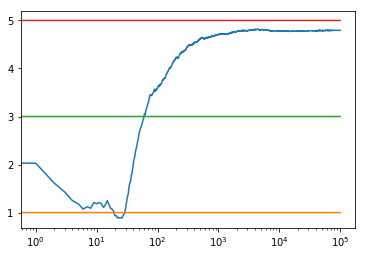

0.9942488357436665
3.0222763857480506
4.997011144909703


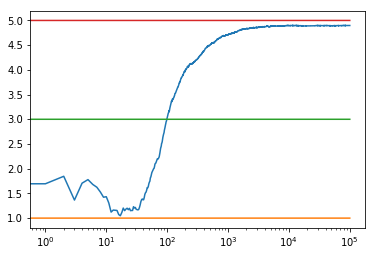

1.031250907456423
3.000348558656617
4.998808491504637


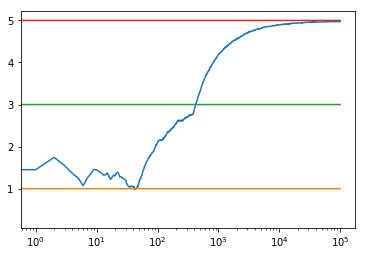

1.0398083439600228
2.9771086368412805
5.004912963608178


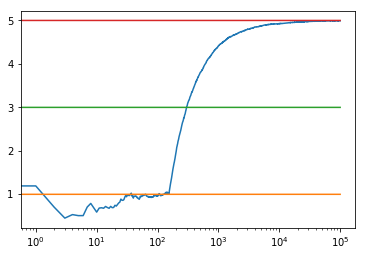

1.030180244993752
3.201922328714202
4.999262697118371


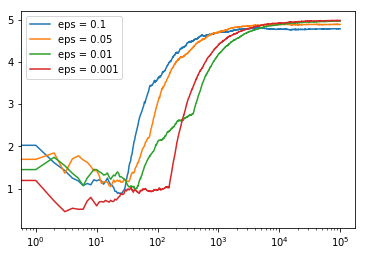

In [12]:
# try 3:     means further apart

if __name__ == '__main__':
    
    c_1 = run_experiment(1.0, 3.0, 5.0, 0.1, 100000) # 1.0, 3.0, 5.0, = mean,  0.1 = epsilon values, 100000 = epochs
    c_05 = run_experiment(1.0, 3.0, 5.0, 0.05, 100000) 
    c_01 = run_experiment(1.0, 3.0, 5.0, 0.01, 100000)  
    c_001 = run_experiment(1.0, 3.0, 5.0, 0.001, 100000)

    # log scale plot
    plt.plot(c_1[0], label='eps = 0.1')
    plt.plot(c_05[0], label='eps = 0.05')
    plt.plot(c_01[0], label='eps = 0.01')
    plt.plot(c_001[0], label = 'eps = 0.001')
    plt.legend()
    plt.xscale('log')
    plt.show()

# red line in the last graph takes the longest to converge (the furthest on the X-axis)

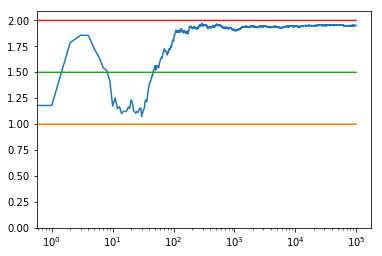

0.9943472471327539
1.5196462466271357
2.0028057312252923


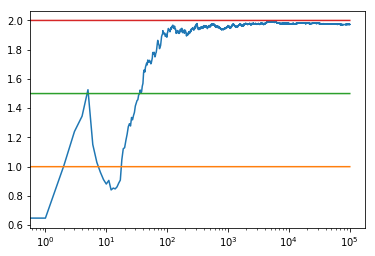

0.999560194865729
1.5078732958722858
1.9978174937337245


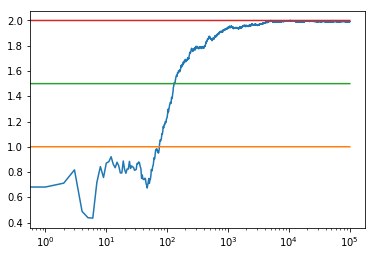

0.8477444429103732
1.4659850156882228
1.996652312922456


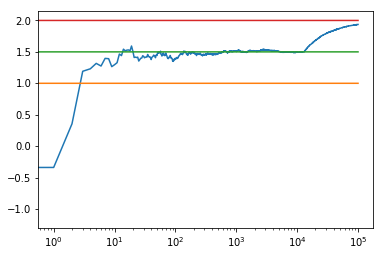

1.1159999751796985
1.495803580758923
2.0016877716494625


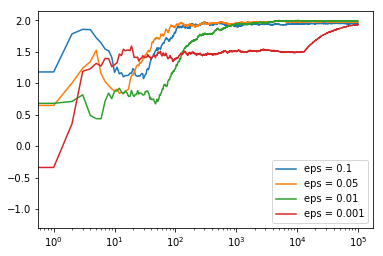

In [13]:
# try 4:, even closer means

if __name__ == '__main__':
    
    c_1 = run_experiment(1.0, 1.5, 2.0, 0.1, 100000) # 1.0, 1.5, 2.0, = mean,  0.1 = epsilon values, 100000 = epochs
    c_05 = run_experiment(1.0, 1.5, 2.0, 0.05, 100000) 
    c_01 = run_experiment(1.0, 1.5, 2.0, 0.01, 100000)  
    c_001 = run_experiment(1.0, 1.5, 2.0, 0.001, 100000)

    # log scale plot
    plt.plot(c_1[0], label='eps = 0.1')
    plt.plot(c_05[0], label='eps = 0.05')
    plt.plot(c_01[0], label='eps = 0.01')
    plt.plot(c_001[0], label = 'eps = 0.001')
    plt.legend()
    plt.xscale('log')
    plt.show()

# red line in the last graph takes the longest to converge (the furthest on the X-axis)

In [ ]:
# THE END